<a href="https://colab.research.google.com/github/2303A52083/23CSBTB39-AIML/blob/main/AIML_A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

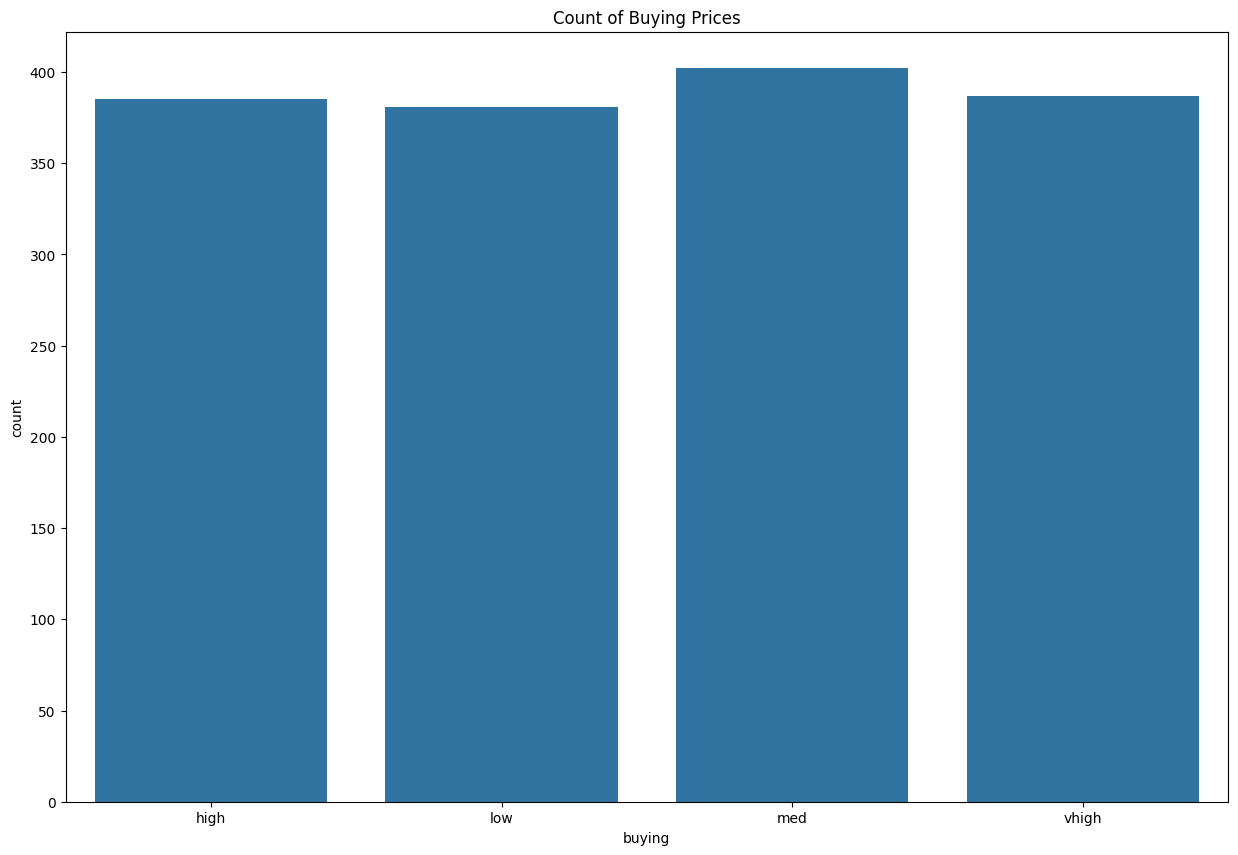

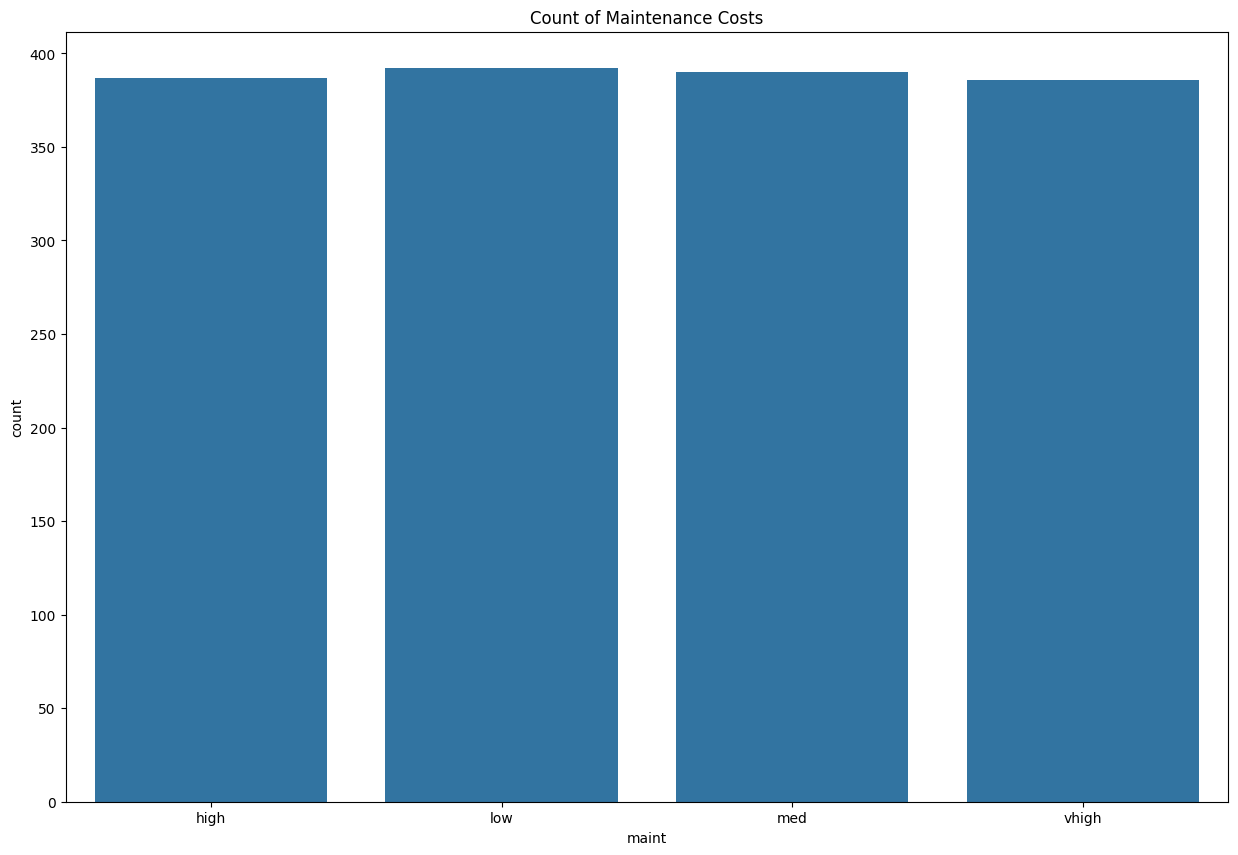

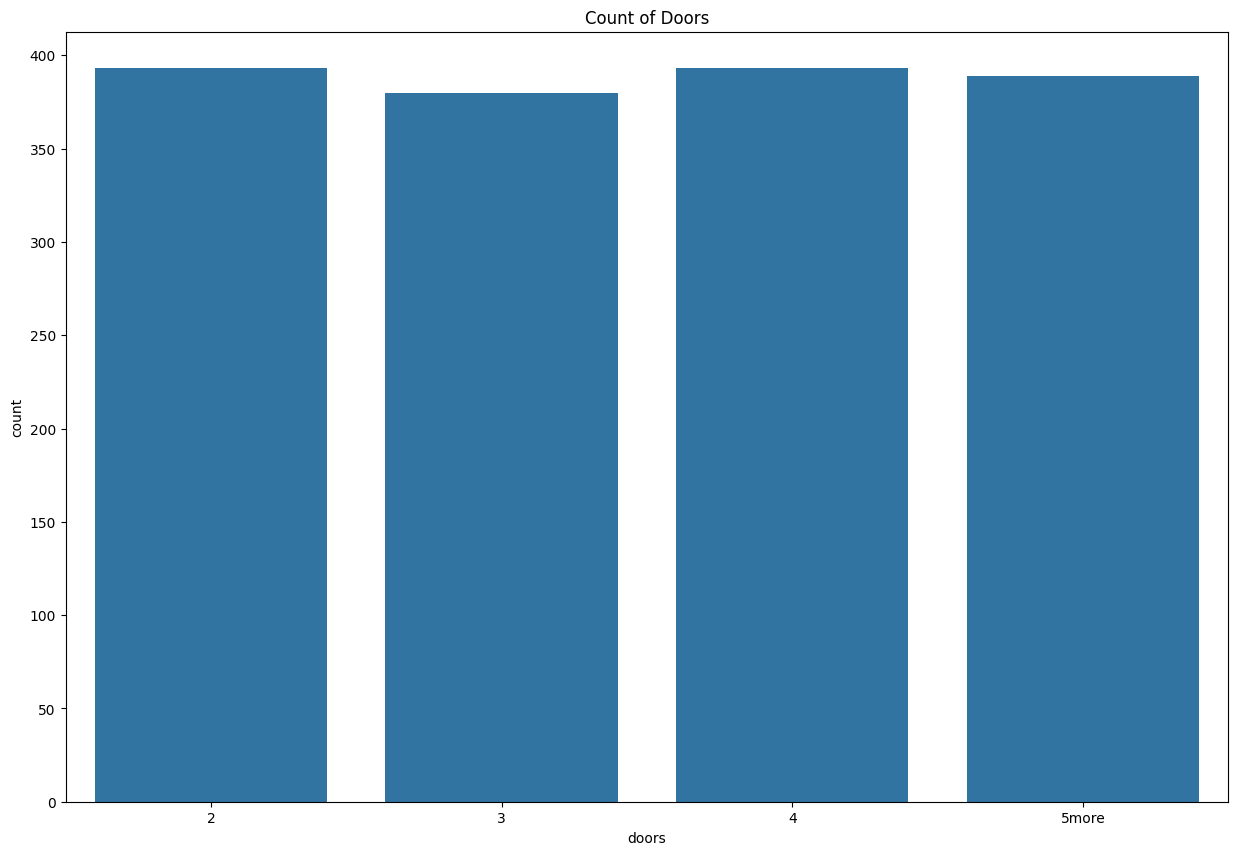

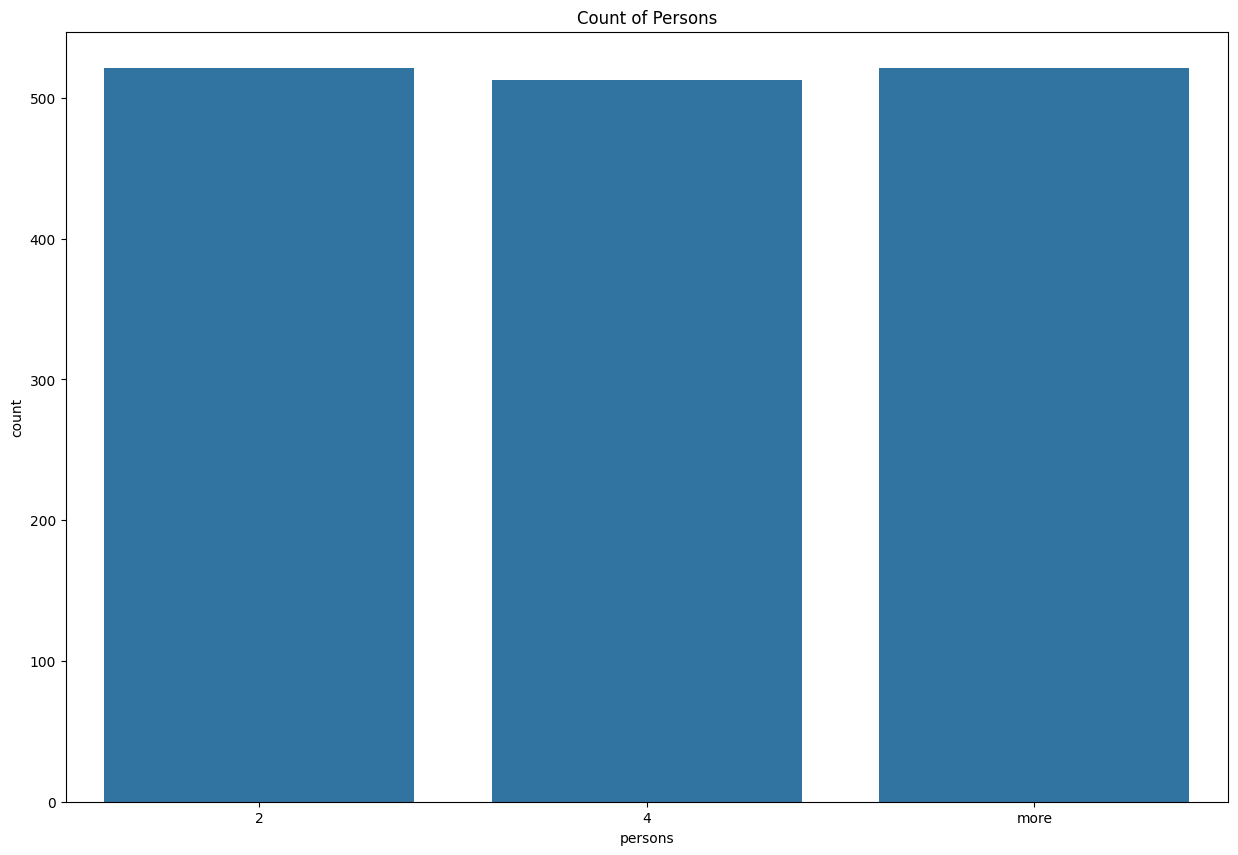

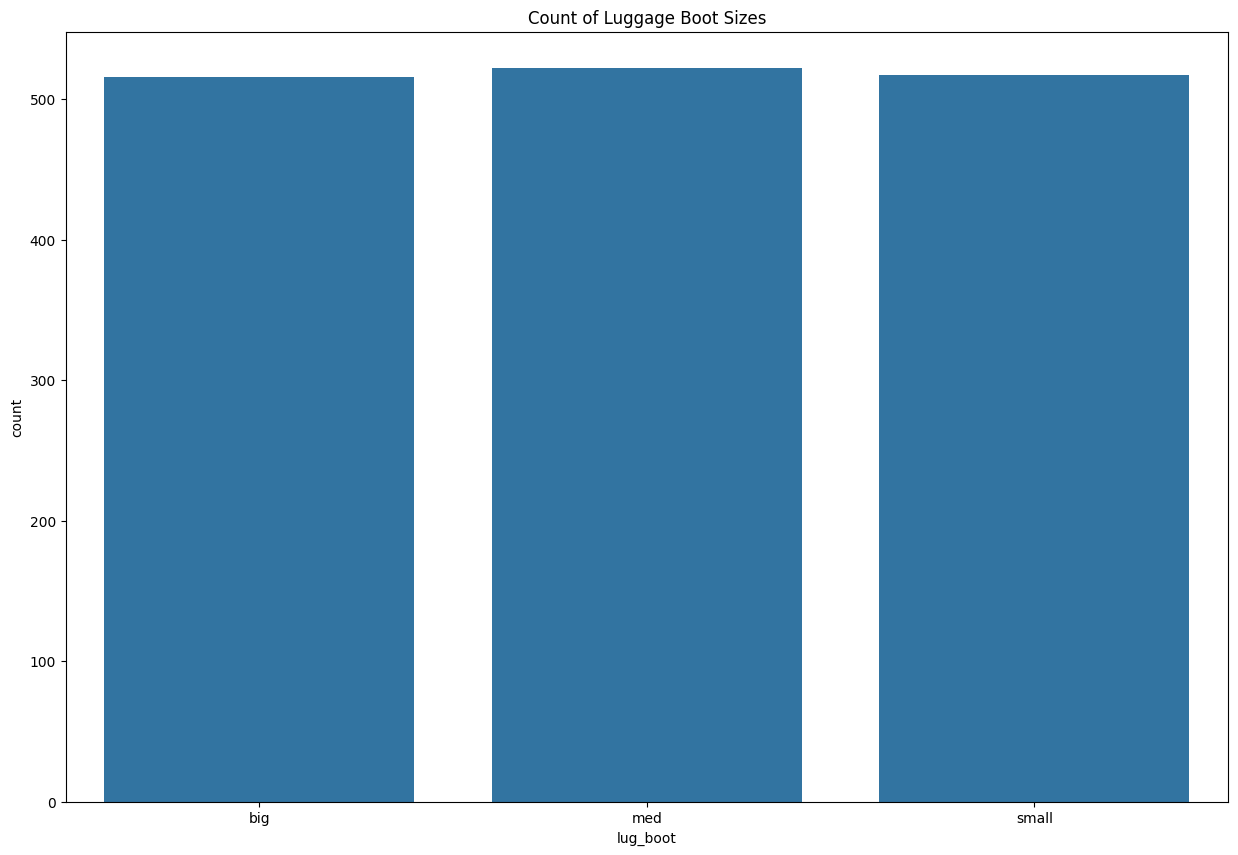

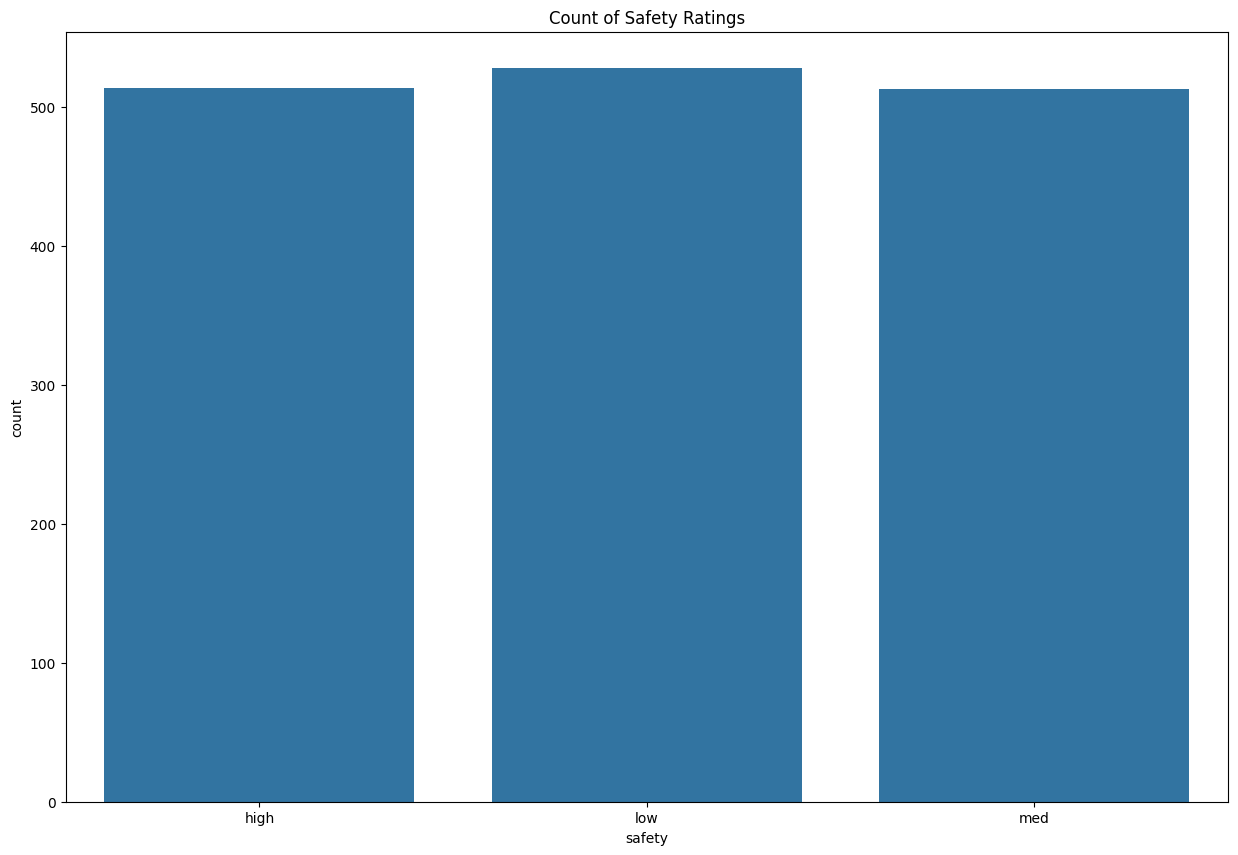

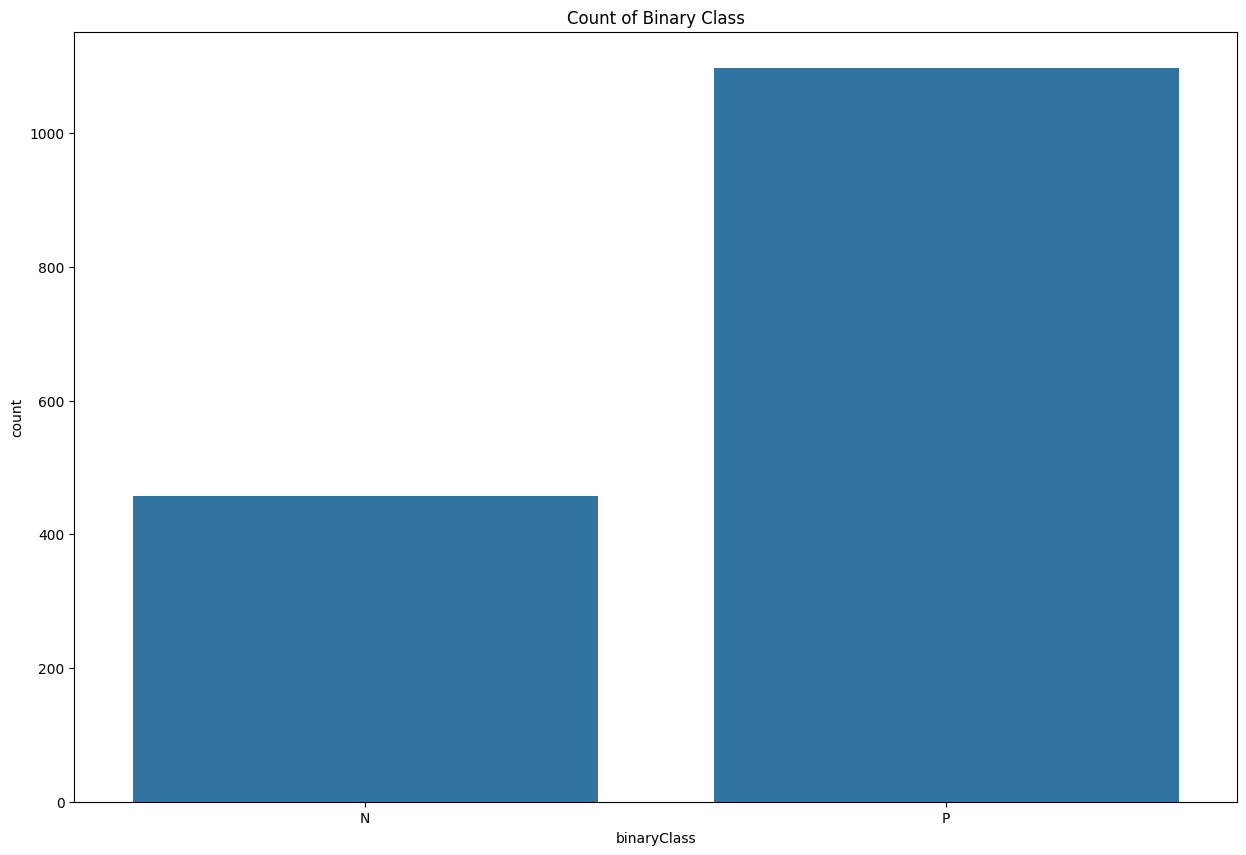

Training Accuracy: 1.0
Training Confusion Matrix:
 [[ 458    0]
 [   0 1097]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555

Fitting 3 folds for each of 9000 candidates, totalling 27000 fits


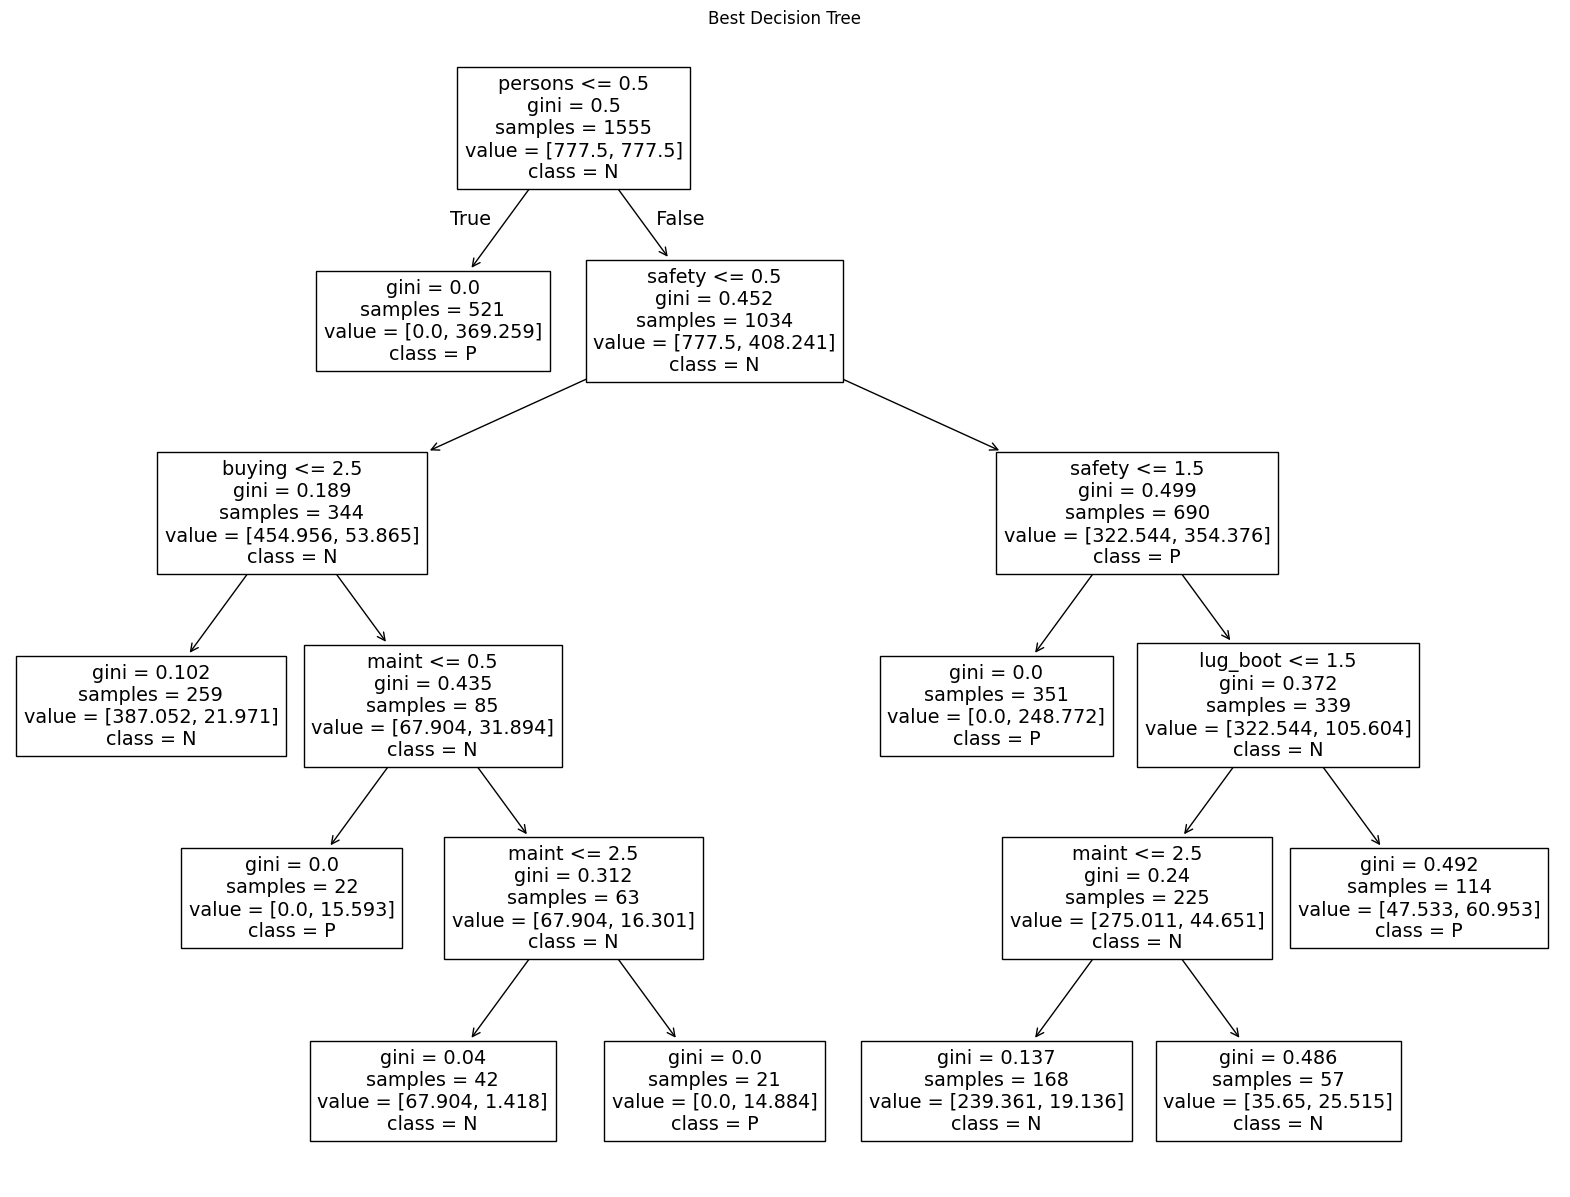

Test Accuracy: 0.884393063583815
Test Confusion Matrix:
 [[ 53   7]
 [ 13 100]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        60
           1       0.93      0.88      0.91       113

    accuracy                           0.88       173
   macro avg       0.87      0.88      0.88       173
weighted avg       0.89      0.88      0.89       173

Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        60
           1       0.93      0.88      0.91       113

    accuracy                           0.88       173
   macro avg       0.87      0.88      0.88       173
weighted avg       0.89      0.88      0.89       173



In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

car_data = fetch_openml(name='car', version=2, parser='auto')
car_data = car_data.frame

train_data, test_data = train_test_split(car_data, test_size=0.1, random_state=20)

plt.figure(figsize=(15, 10))
sns.countplot(data=train_data, x='buying')
plt.title('Count of Buying Prices')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=train_data, x='maint')
plt.title('Count of Maintenance Costs')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=train_data, x='doors')
plt.title('Count of Doors')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=train_data, x='persons')
plt.title('Count of Persons')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=train_data, x='lug_boot')
plt.title('Count of Luggage Boot Sizes')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=train_data, x='safety')
plt.title('Count of Safety Ratings')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=train_data, x='binaryClass')
plt.title('Count of Binary Class')
plt.show()

car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data['binaryClass']
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels.ravel())

tree_clf = DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

def accuracy(input_data, model, labels):
    preds = model.predict(input_data)
    acc = accuracy_score(labels, preds)
    return acc

def conf_matrix(input_data, model, labels):
    preds = model.predict(input_data)
    cm = confusion_matrix(labels, preds)
    return cm

def class_report(input_data, model, labels):
    preds = model.predict(input_data)
    report = classification_report(labels, preds)
    print(report)
    return report

print("Training Accuracy:", accuracy(car_train_prepared, tree_clf, car_labels_prepared))
print("Training Confusion Matrix:\n", conf_matrix(car_train_prepared, tree_clf, car_labels_prepared))
print("Training Classification Report:\n", class_report(car_train_prepared, tree_clf, car_labels_prepared))

import warnings
warnings.filterwarnings('ignore')

params_grid = {
    'max_leaf_nodes': list(range(0, 10)),
    'min_samples_split': [0, 1, 2, 3, 4],
    'min_samples_leaf': [0, 1, 2, 3, 4],
    'max_depth': [0, 1, 2, 3, 4, 5],
    'max_features': [0, 1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)
grid_search.fit(car_train_prepared, car_labels_prepared)

tree_best = grid_search.best_estimator_

plt.figure(figsize=(20, 15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N', 'P'])
plt.title('Best Decision Tree')
plt.show()

car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']
car_test_prepared = pipe.transform(car_test)
car_test_labels_prepared = label_enc.transform(car_test_labels.ravel())

print("Test Accuracy:", accuracy(car_test_prepared, tree_best, car_test_labels_prepared))
print("Test Confusion Matrix:\n", conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared))
print("Test Classification Report:\n", class_report(car_test_prepared, tree_best, car_test_labels_prepared))
